<a href="https://colab.research.google.com/github/JorgeDuarte1509/Actividades_Aprendizaje-/blob/main/Reto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Ciencia y analítica de datos**

# Tecnológico de Monterrey

# Dra. María de la Paz Rico

# Reto 2

# Nombre y matrícula de los estudiantes:

# Manuel Gerardo Licera Aguirre A00947315

# Jorge Alberto Duarte Salinas A01793015

# Fecha: 18/11/2022

# Liga de repositorio en Github del Equipo 77:
# https://github.com/PosgradoMNA/actividades-del-projecto-equipo-77/blob/main/Reto_2.ipynb

In [1]:
# Importacion de librerias
from google.colab import drive
import warnings
import seaborn as sns 
import pandas as pd
import numpy as np
import time
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import ColumnTransformer
from sklearn import tree

In [2]:
# Leemos base de datos del drive
filename1 = '/content/drive/MyDrive/dataset_aguas_subterraneas.xlsx'
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Conversion a pandas df
df1 = pd.read_excel(filename1)

# Limpieza Base de datos



In [4]:
df1.isna().any() # Revisamos si hay datos faltantes en el dataframe

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [5]:
df1.info() # Desplegamos el tipo de variables del df1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [6]:
df1.shape # Tamaño del df1

(1068, 57)

In [7]:
df1 = df1.drop(["SDT_mg/L"], axis =1) # Eliminamos SDT_mg/L ya que no tiene registros en esa columna

In [8]:
df1.CONTAMINANTES = df1.CONTAMINANTES.fillna('sin_contaminante') # Reemplazamos columnas vacias de contaminantes por el termino "sin contaminante" ya que solo esta vacio cuando esta en semaforo verde

In [9]:
ndf1 = df1.copy()

In [10]:
df1.dropna(axis = 0, inplace = True) # Quitamos filas con valores vacios en cualquier variable

In [11]:
df1.shape # Volvemos a imprimir el tamaño despues de la limpieza, se quitaron 14 filas

(1054, 56)

In [12]:
df1.isna().any() # Ya no se tienen valores faltantes

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                False
CALIDAD_ALC             False
CONDUCT_mS/cm           False
CALIDAD_CONDUC          False
SDT_M_mg/L              False
CALIDAD_SDT_ra          False
CALIDAD_SDT_salin       False
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                False
CALIDAD_DUR             False
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L              False
CALIDAD_N_NO3           False
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

# Exploracion Base de datos

In [13]:
df1.head() # Mostramos primeros 5 datos del df1

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CA—ADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [14]:
df1.describe() # Descripcion del df1

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm
count,1054.000000,1054.000000,1054.0,1054.000000,1054.000000
mean,-101.848270,23.161796,2020.0,234.695266,1142.726471
std,6.697568,3.875005,0.0,111.147849,1248.990617
min,-116.664250,14.561150,2020.0,26.640000,110.000000
25%,-105.385170,20.224857,2020.0,164.257500,506.000000
50%,-102.170665,22.640705,2020.0,215.825000,820.000000
75%,-98.971268,25.508770,2020.0,292.930000,1328.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000


In [15]:
df1.mean() # Desplegamos los promedios de las variables numericas del df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD         -101.848270
LATITUD            23.161796
PERIODO          2020.000000
ALC_mg/L          234.695266
CONDUCT_mS/cm    1142.726471
SDT_M_mg/L        896.945797
dtype: float64

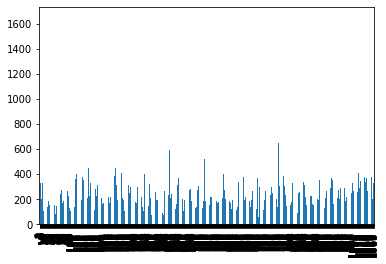

In [16]:
df1["ALC_mg/L"].plot(kind="bar") # Grafica de barras

In [17]:
df1.dtypes # Desplegamos el tipo de datos

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_CR               object
HG_TOT_m

In [18]:
df1['SDT_M_mg/L'] = df1['SDT_M_mg/L'].astype(float) # Cambiamos la variable a tipo float

In [19]:
df1.describe() # Descripcion de las principales metricas del dataframe

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L
count,1054.000000,1054.000000,1054.0,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,2020.0,234.695266,1142.726471,896.945797
std,6.697568,3.875005,0.0,111.147849,1248.990617,2765.757924
min,-116.664250,14.561150,2020.0,26.640000,110.000000,101.200000
25%,-105.385170,20.224857,2020.0,164.257500,506.000000,338.050000
50%,-102.170665,22.640705,2020.0,215.825000,820.000000,551.400000
75%,-98.971268,25.508770,2020.0,292.930000,1328.000000,915.600000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000


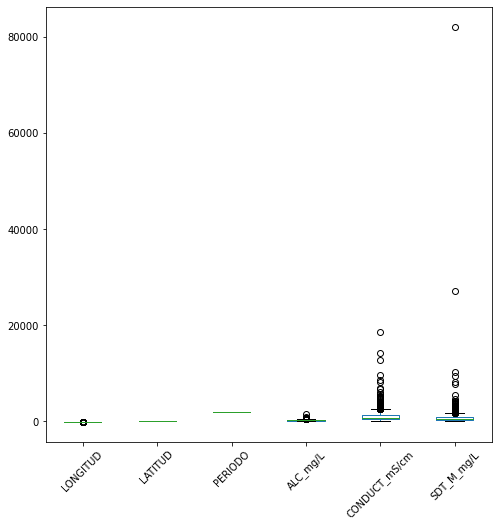

In [20]:
df1.boxplot(column = ['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L','CONDUCT_mS/cm', 'SDT_M_mg/L'], grid = False, rot=45, figsize=(8,8)) # Boxplot de las variables, se pueden ver unos outliers

In [21]:
df1.iloc[15:30,17:28]

,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L
15,0.4116,Media,187.248,Potable - Dura,<1.1,Potable - Excelente,9.224505,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003
16,0.6076,Media,199.2,Potable - Dura,<1.1,Potable - Excelente,3.146125,Potable - Excelente,<0.01,Potable - Excelente,<0.003
17,0.4142,Media,3426.24,Muy dura e indeseable usos industrial y domestico,<1.1,Potable - Excelente,9.579012,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003
19,0.2563,Baja,241.4624,Potable - Dura,10,Buena calidad,8.444545,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003
20,0.8969,Potable - Optima,352.2976,Potable - Dura,521,Aceptable,5.677573,Potable - Buena calidad,0.0485,No apta como FAAP,<0.003
21,0.3557,Baja,362.1936,Potable - Dura,<1.1,Potable - Excelente,6.520263,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003
22,0.3542,Baja,287.2224,Potable - Dura,<1.1,Potable - Excelente,8.844383,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003
23,0.2572,Baja,313.1522,Potable - Dura,3654,Contaminada,7.535822,Potable - Buena calidad,0.0156,Apta como FAAP,<0.003
24,0.3102,Baja,341.7525,Potable - Dura,240,Aceptable,4.060667,Potable - Excelente,<0.01,Potable - Excelente,<0.003
25,0.3062,Baja,241.5623,Potable - Dura,43,Buena calidad,3.863066,Potable - Excelente,<0.01,Potable - Excelente,<0.003


In [22]:
ndf1 = df1.copy() # Copiamos el df1 a una nueva variable ndf1

In [23]:
ndf1.shape # Tamaño del ndf1

(1054, 56)

In [24]:
ndf1["FLUORUROS_mg/L"]=ndf1["FLUORUROS_mg/L"].values.astype(str)
ndf1['FLUORUROS_mg/L'] = ndf1['FLUORUROS_mg/L'].apply(lambda x: float(x[1:]) if x.startswith('<') else float(x))

ndf1["DUR_mg/L"]=ndf1["DUR_mg/L"].values.astype(str)
ndf1['DUR_mg/L'] = ndf1['DUR_mg/L'].apply(lambda x: float(x[1:]) if x.startswith('<') else float(x))

ndf1["COLI_FEC_NMP/100_mL"]=ndf1["COLI_FEC_NMP/100_mL"].values.astype(str)
ndf1['COLI_FEC_NMP/100_mL'] = ndf1['COLI_FEC_NMP/100_mL'].apply(lambda x: float(x[1:]) if x.startswith('<') else float(x))

ndf1["N_NO3_mg/L"]=ndf1["N_NO3_mg/L"].values.astype(str)
ndf1['N_NO3_mg/L'] = ndf1['N_NO3_mg/L'].apply(lambda x: float(x[1:]) if x.startswith('<') else float(x))

ndf1["AS_TOT_mg/L"]=ndf1["AS_TOT_mg/L"].values.astype(str)
ndf1['AS_TOT_mg/L'] = ndf1['AS_TOT_mg/L'].apply(lambda x: float(x[1:]) if x.startswith('<') else float(x))

ndf1["CD_TOT_mg/L"]=ndf1["CD_TOT_mg/L"].values.astype(str)
ndf1['CD_TOT_mg/L'] = ndf1['CD_TOT_mg/L'].apply(lambda x: float(x[1:]) if x.startswith('<') else float(x))
ndf1

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CA—ADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [25]:
columnas_cambiar = ['FLUORUROS_mg/L', 'DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                    'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] # Agrupamos variables al arreglo columnas para cambiar


for i in range(len(columnas_cambiar)): # Ciclo for para quitar el simbolo < de las variables de arriba, una vez que se quita el simbolo se cambia a tipo de dato float

  ndf1[columnas_cambiar[i]]=ndf1[columnas_cambiar[i]].values.astype(str)
  ndf1[columnas_cambiar[i]] = ndf1[columnas_cambiar[i]].apply(lambda x: float(x[1:]) if x.startswith('<') else float(x))

ndf1.iloc[15:30,17:28] 

,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L
15,0.4116,Media,187.2480,Potable - Dura,1.1,Potable - Excelente,9.224505,Potable - Buena calidad,0.0100,Potable - Excelente,0.003
16,0.6076,Media,199.2000,Potable - Dura,1.1,Potable - Excelente,3.146125,Potable - Excelente,0.0100,Potable - Excelente,0.003
17,0.4142,Media,3426.2400,Muy dura e indeseable usos industrial y domestico,1.1,Potable - Excelente,9.579012,Potable - Buena calidad,0.0100,Potable - Excelente,0.003
19,0.2563,Baja,241.4624,Potable - Dura,10.0,Buena calidad,8.444545,Potable - Buena calidad,0.0100,Potable - Excelente,0.003
20,0.8969,Potable - Optima,352.2976,Potable - Dura,521.0,Aceptable,5.677573,Potable - Buena calidad,0.0485,No apta como FAAP,0.003
21,0.3557,Baja,362.1936,Potable - Dura,1.1,Potable - Excelente,6.520263,Potable - Buena calidad,0.0100,Potable - Excelente,0.003
22,0.3542,Baja,287.2224,Potable - Dura,1.1,Potable - Excelente,8.844383,Potable - Buena calidad,0.0100,Potable - Excelente,0.003
23,0.2572,Baja,313.1522,Potable - Dura,3654.0,Contaminada,7.535822,Potable - Buena calidad,0.0156,Apta como FAAP,0.003
24,0.3102,Baja,341.7525,Potable - Dura,240.0,Aceptable,4.060667,Potable - Excelente,0.0100,Potable - Excelente,0.003
25,0.3062,Baja,241.5623,Potable - Dura,43.0,Buena calidad,3.863066,Potable - Excelente,0.0100,Potable - Excelente,0.003


In [26]:
ndf1.dtypes # Podemos ver que el ciclo for funciono, ya tenemos las variables numericas

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR               object
HG_TOT_m

In [27]:
ndf1.describe() # Descripcion de las principales métricas del dataframe

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1054.000000,1054.000000,1054.0,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.00000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,2020.0,234.695266,1142.726471,896.945797,1.078547,349.893584,359.734156,4.321651,0.019504,0.00303,0.013353,0.000557,0.005285,0.072960,0.412234
std,6.697568,3.875005,0.0,111.147849,1248.990617,2765.757924,1.931204,360.960153,2065.705773,8.378332,0.035051,0.00090,0.155412,0.000470,0.003276,0.378856,5.574307
min,-116.664250,14.561150,2020.0,26.640000,110.000000,101.200000,0.200000,20.000000,1.100000,0.020000,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.025000
25%,-105.385170,20.224857,2020.0,164.257500,506.000000,338.050000,0.269475,121.512000,1.100000,0.651667,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.025000
50%,-102.170665,22.640705,2020.0,215.825000,820.000000,551.400000,0.506950,245.994450,1.100000,2.082916,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.046900
75%,-98.971268,25.508770,2020.0,292.930000,1328.000000,915.600000,1.142400,455.617200,10.750000,5.190385,0.010000,0.00300,0.005000,0.000500,0.005000,0.009830,0.172275
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.03211,5.003200,0.014150,0.080900,8.982000,178.615000


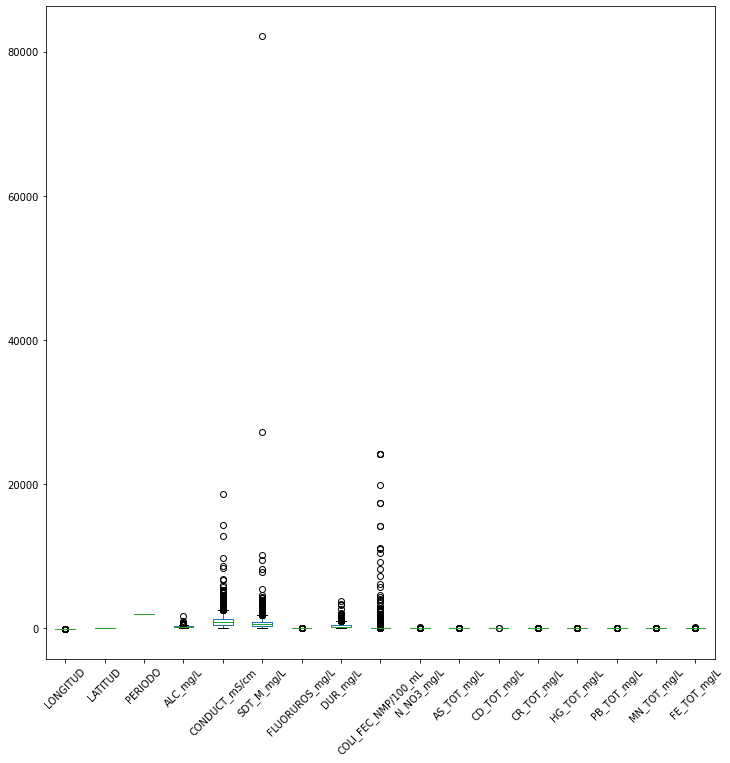

In [28]:
ndf1.boxplot(column = ['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L','CONDUCT_mS/cm', 'SDT_M_mg/L','FLUORUROS_mg/L', 'DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                    'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'], grid = False, rot=45, figsize=(12,12)) # Nuevo boxplot con las nuevas variables numericas, se pueden ver mas outliers

In [29]:
ndf1

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CA—ADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [30]:
ndf1.corr() # Matriz de correlacion del dataframe

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
LONGITUD,1.000000,-0.759172,NaN,0.171424,0.061019,-0.014445,-0.122782,0.086135,-0.086028,-0.107975,-0.076670,0.043708,0.059017,0.040505,-0.005083,-0.037974,0.021542
LATITUD,-0.759172,1.000000,NaN,-0.073635,0.053096,0.060439,0.129533,0.086892,0.063804,0.150365,0.094426,-0.053610,-0.059094,-0.102215,-0.045850,-0.035594,-0.041673
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.171424,-0.073635,NaN,1.000000,0.231425,0.074510,0.067328,0.251862,-0.015783,0.005435,0.065314,0.034816,-0.014600,0.072218,0.016652,0.130373,0.043286
CONDUCT_mS/cm,0.061019,0.053096,NaN,0.231425,1.000000,0.286204,-0.026817,0.692734,0.017348,0.219774,-0.004550,0.028969,0.004304,0.059364,0.023845,0.095659,0.083192
SDT_M_mg/L,-0.014445,0.060439,NaN,0.074510,0.286204,1.000000,-0.014872,0.347015,-0.001160,0.102103,-0.010885,0.010795,-0.000678,0.015284,-0.005581,0.018260,0.019853
FLUORUROS_mg/L,-0.122782,0.129533,NaN,0.067328,-0.026817,-0.014872,1.000000,-0.150231,0.003359,-0.019285,0.446400,-0.015219,-0.005338,-0.025773,-0.032467,-0.050038,-0.009993
DUR_mg/L,0.086135,0.086892,NaN,0.251862,0.692734,0.347015,-0.150231,1.000000,0.031041,0.301927,-0.103704,0.024885,0.007215,0.064358,-0.019430,0.082727,0.059483
COLI_FEC_NMP/100_mL,-0.086028,0.063804,NaN,-0.015783,0.017348,-0.001160,0.003359,0.031041,1.000000,-0.000933,0.038762,-0.001725,-0.008918,-0.007580,0.022336,-0.005514,0.002994
N_NO3_mg/L,-0.107975,0.150365,NaN,0.005435,0.219774,0.102103,-0.019285,0.301927,-0.000933,1.000000,-0.005037,-0.009390,-0.015169,0.014882,-0.016586,-0.036568,0.013543


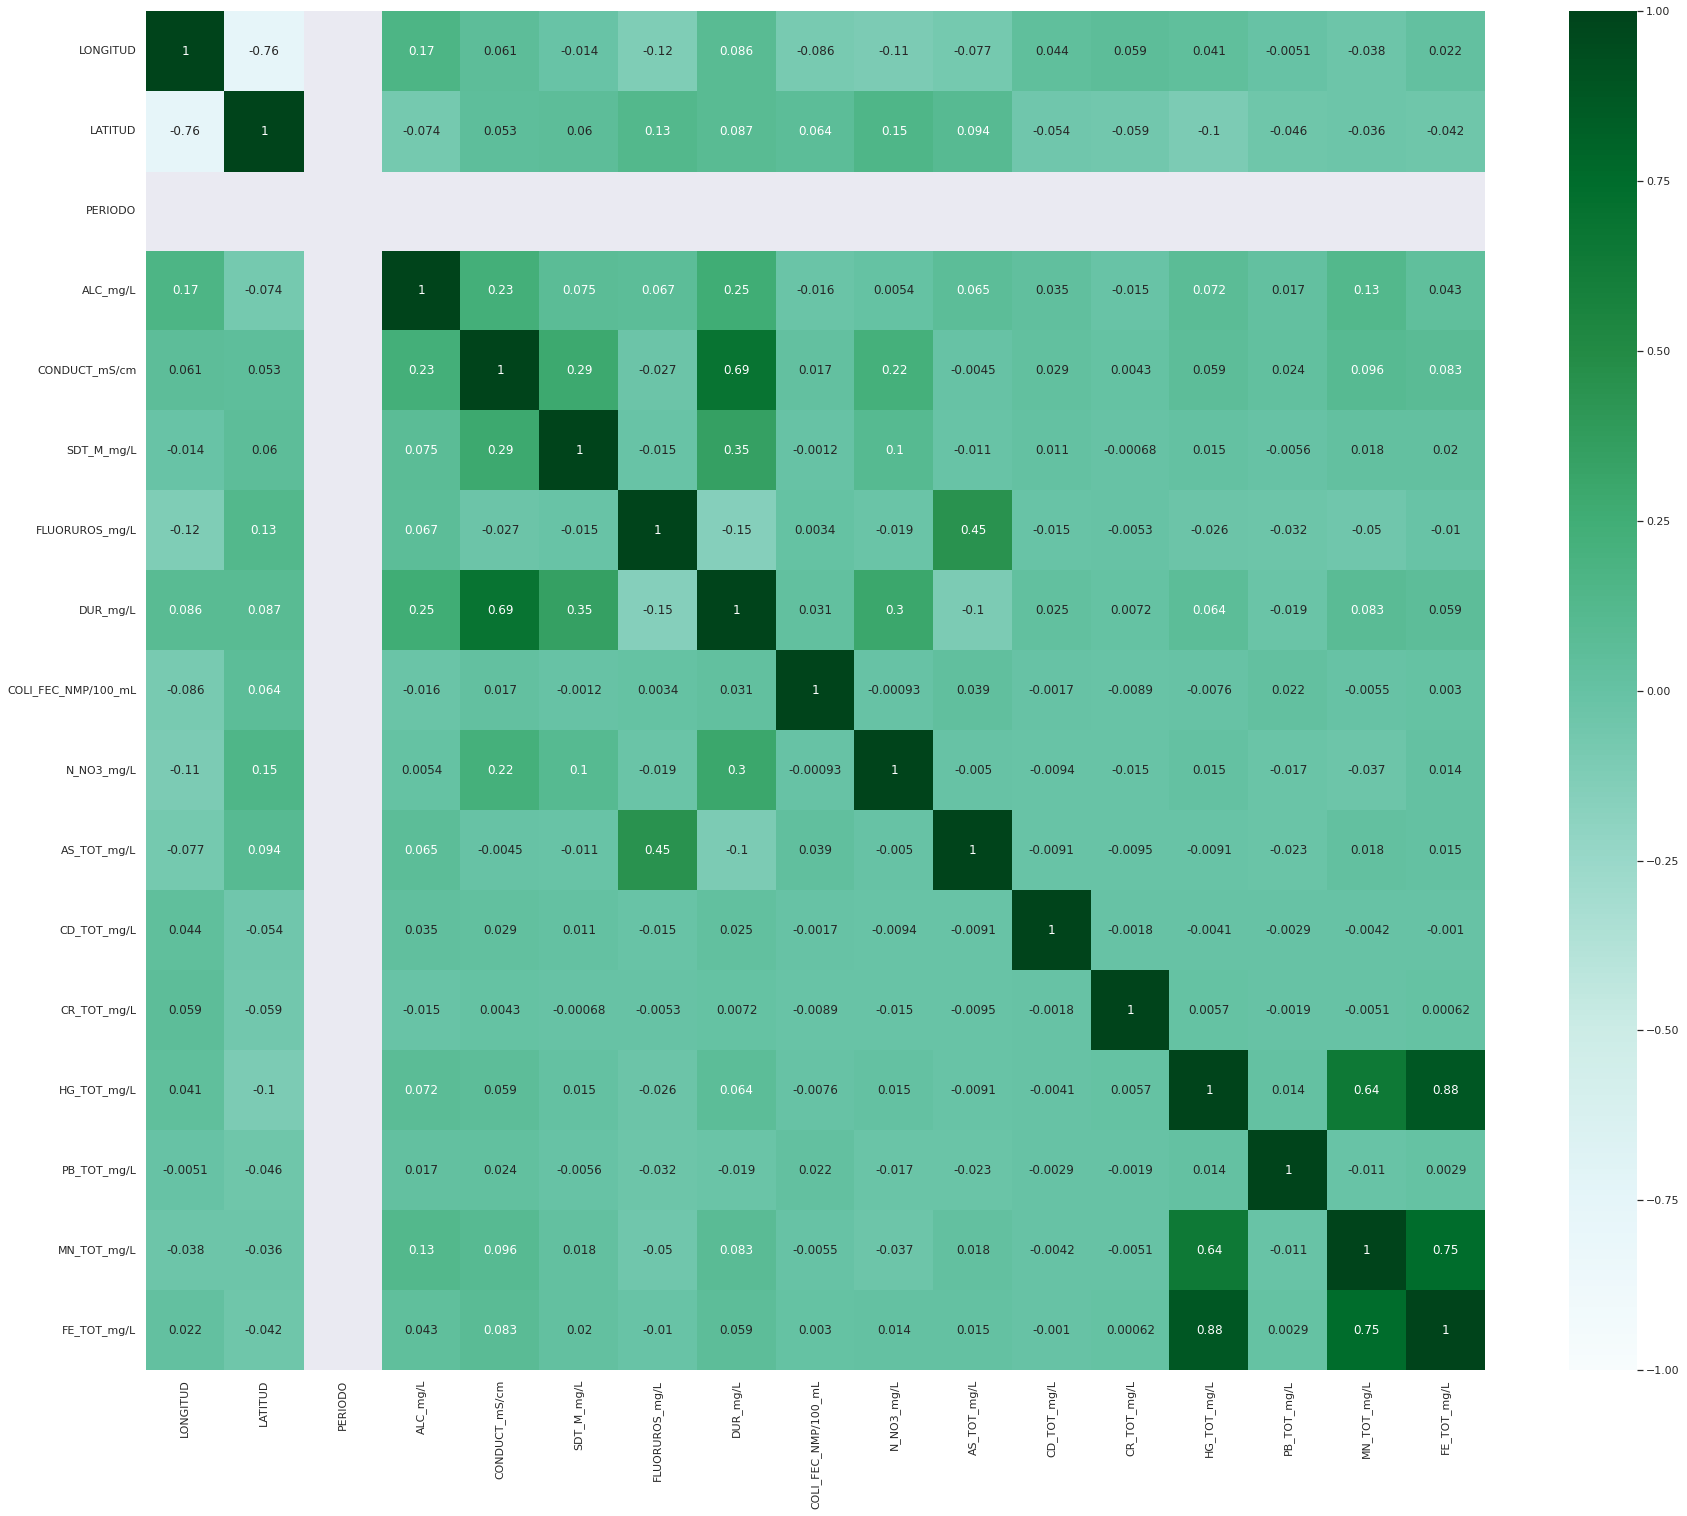

In [31]:
corrs = ndf1.corr()
sns.set(rc = {'figure.figsize':(30,25)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True) # Desplegamos la matriz de correlacion de ua manera visual

In [32]:
!pip install --upgrade geopandas # Instalamos el kit de geopandas para trabajar lat y lon 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 51.1 MB/s 
     |████████████████████████████████| 16.7 MB 43.3 MB/s 


In [33]:
#Importacion de librerias
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline



In [34]:
# Codigo para cargar mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


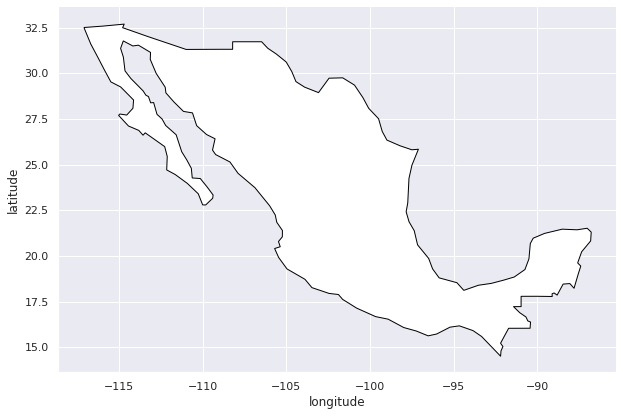

In [35]:
#Codigo para visualizar el mapa de Mexico con latitud y longitud en los ejes
fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

In [36]:
# Se divide el dataframe en 3 nuevos arreglos dependiendo el tipo de semaforo
ndf2 = ndf1.loc[ndf1['SEMAFORO'] == 'Verde']
ndf3 = ndf1.loc[ndf1['SEMAFORO'] == 'Amarillo']
ndf4 = ndf1.loc[ndf1['SEMAFORO'] == 'Rojo']

In [37]:
latlong=ndf2[["LATITUD","LONGITUD"]]

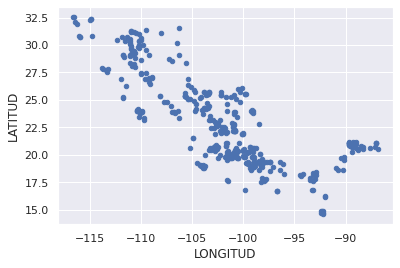

In [38]:
latlong.plot.scatter( "LONGITUD","LATITUD") # Se grafica la latitud y longitud, se puede ver el mapa de mexico

In [39]:
# Coonvertimos en puntos los 3 nuevos dataframes para poder graficarlos
ndf2["Coordinates"] = list(zip(ndf2.LONGITUD, ndf2.LATITUD))
ndf2["Coordinates"] = ndf2["Coordinates"].apply(Point)

ndf3["Coordinates"] = list(zip(ndf3.LONGITUD, ndf3.LATITUD))
ndf3["Coordinates"] = ndf3["Coordinates"].apply(Point)

ndf4["Coordinates"] = list(zip(ndf4.LONGITUD, ndf4.LATITUD))
ndf4["Coordinates"] = ndf4["Coordinates"].apply(Point)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [40]:
# Trabajamos los 3 nuevos dataframes para poder graficarlos con Geopandas
gdf1 = gpd.GeoDataFrame(ndf2, geometry="Coordinates")
gdf2 = gpd.GeoDataFrame(ndf3, geometry="Coordinates")
gdf3 = gpd.GeoDataFrame(ndf4, geometry="Coordinates")

gdf1.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CA—ADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-110.21396 23.47460)
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-110.08878 23.79986)


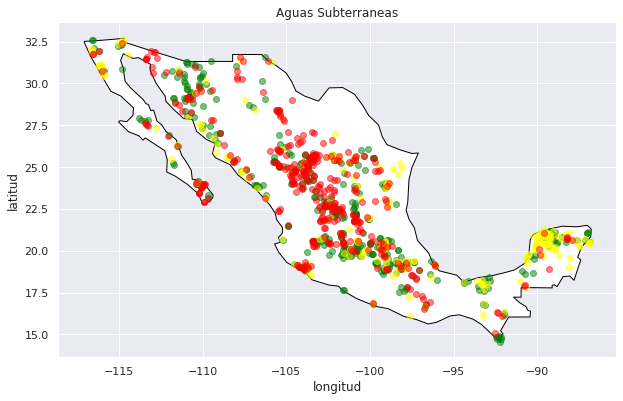

In [41]:
# Graficamos los 3 dataframes segun el tipo se semaforo
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gdf1.plot(ax=gax, color='green', alpha = 0.5)
gdf2.plot(ax=gax, color='yellow', alpha = 0.5)
gdf3.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas Subterraneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

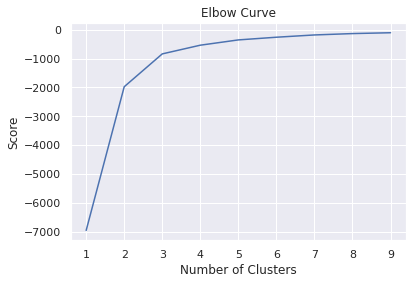

In [42]:
# Obtenemos la curva del kmenas para poder seleccionar el numero de clusters
from sklearn.cluster import KMeans


K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters] 
Y_axis = latlong[['LATITUD']]
X_axis = latlong[['LONGITUD']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] 
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [43]:
kmeans = KMeans(n_clusters = 4, init ='k-means++') 

kmeans.fit(latlong[latlong.columns[0:2]])

labels = kmeans.labels_
labels

array([0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       3, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [44]:
X = ndf1[["LONGITUD","LATITUD"]]

kmeans = KMeans(n_clusters=4).fit(X) 
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(X) 
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C) 
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) 


gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates") 
gdf_C

,0,1,Coordinates
0,-103.447389,24.664864,POINT (-103.44739 24.66486)
1,-100.179832,20.169847,POINT (-100.17983 20.16985)
2,-111.262801,28.609425,POINT (-111.26280 28.60943)
3,-90.092716,19.650263,POINT (-90.09272 19.65026)


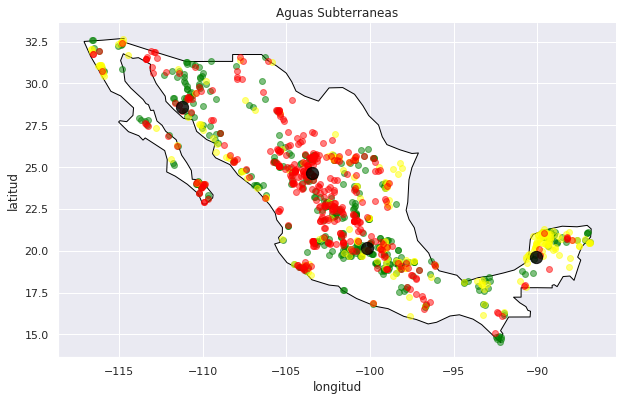

In [45]:
# Graficamos los semaforos con los clusters
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gdf1.plot(ax=gax, color='green', alpha = 0.5)
gdf2.plot(ax=gax, color='yellow', alpha = 0.5)
gdf3.plot(ax=gax, color='red', alpha = 0.5)
gdf_C.plot(ax=gax, color='black', alpha = 0.8, markersize = 150)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas Subterraneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

# Comienzo del Reto 2

Paso 1: Selecciona tus variables independientes X y dependiente Y (semáforo)

In [104]:
#Seleccionamos las variables dependientes e independientes

#features = columns
X = ndf1[["PERIODO","LATITUD","LONGITUD","ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L","CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L","PB_TOT_mg/L","MN_TOT_mg/L","FE_TOT_mg/L"]]
y = ndf1['SEMAFORO'] # Variable dependiente y "SEMAFORO"

Paso 2: Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

In [105]:
#Cambiar a label encoding el semáforo para que solo salgan valores de 1, 2 y 3.
ndf1['SEMAFORO'].replace(['Verde', 'Amarillo', 'Rojo'],[1, 2, 3], inplace=True)
y=y.astype('int') 
y.head()

0    1
1    1
2    3
3    1
4    3
Name: SEMAFORO, dtype: int64

Paso 3: Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [106]:
from sklearn.model_selection import train_test_split  #Dividimos los datos en entrenamiento 80% y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [107]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [108]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.029 seconds


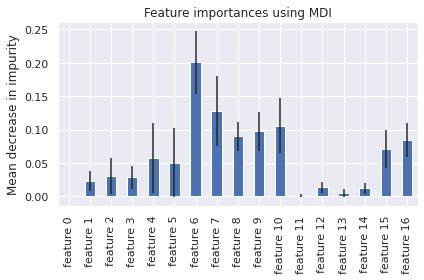

In [109]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [110]:
#Feature importance based on feature permutation
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 6.128 seconds


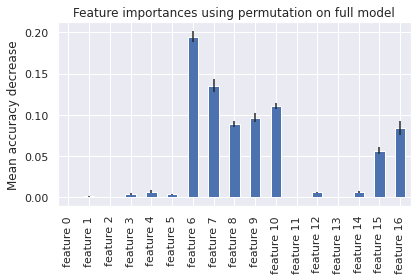

In [111]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

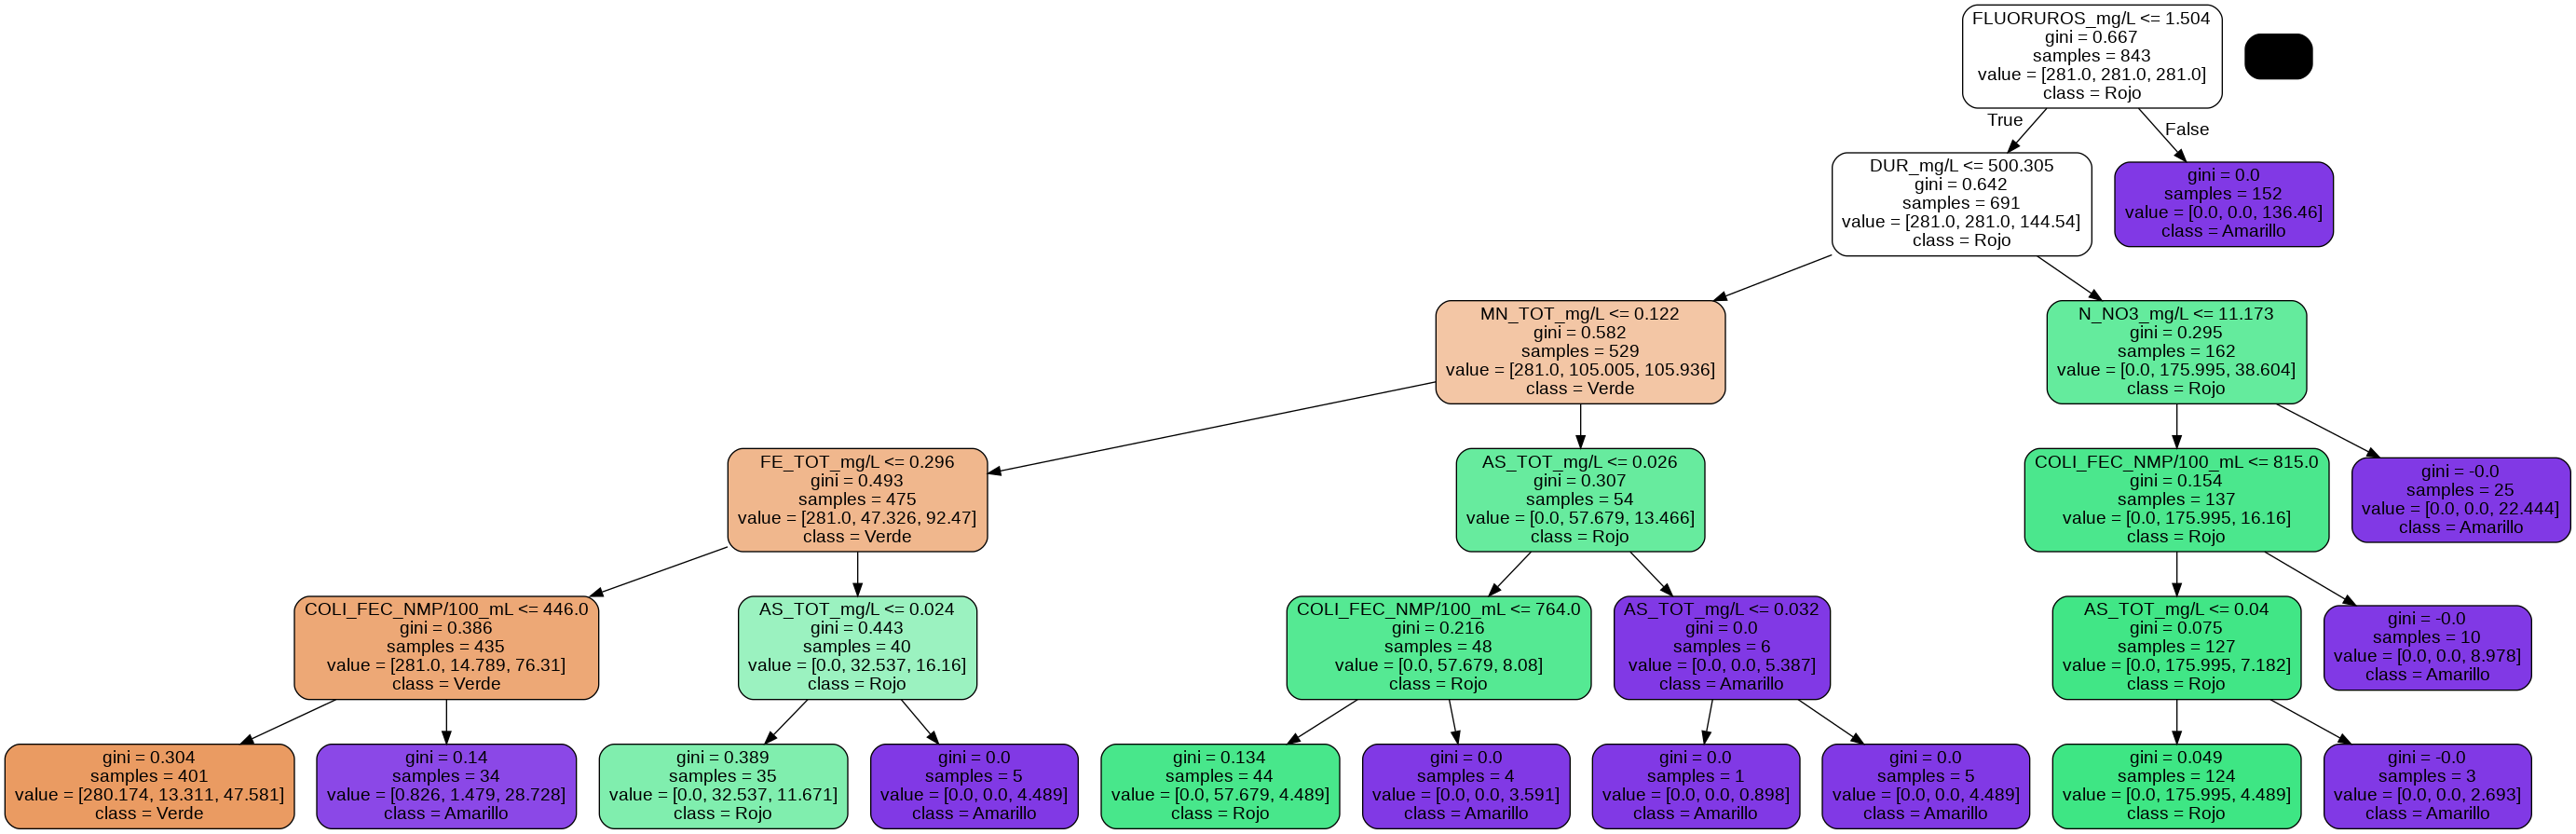

In [112]:
#De manera gráfica tambien hacemos la evaluación de las 'Features importances'

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz

tree_classifier = tree.DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced') #Aqui nos va a balancear la salida
tree_classifier = tree_classifier.fit(X_train, y_train)
modelo_arbol= export_graphviz (tree_classifier,
                        out_file = None,
                        feature_names= X_train.columns,
                        class_names = ['Verde','Rojo','Amarillo'],
                        rounded = True,
                        filled = True)

import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(modelo_arbol)
graph.write_png('DecisionTree.png')
Image(filename = 'DecisionTree.png')


Paso 4: Selecciona las variables de mayor importancia.

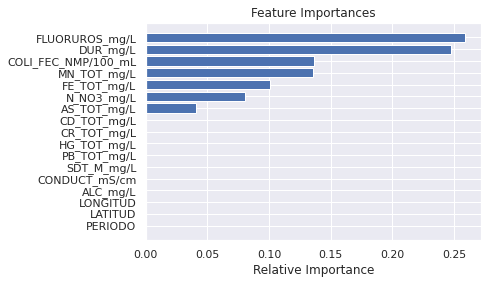

In [113]:
importances = tree_classifier.feature_importances_
indices = np.argsort(importances)
features= X_test.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Variables de mayor relevacia: "FLUORUROS_mg/L", "DUR_mg/L", "COLI_FEC_NMP/100_mL", "N_NO3_mg/L", "AS_TOT_mg/L", "FE_TOT_mg/L", "MN_TOT_mg/L"

In [114]:
#Seleccionar las variables de mayour importancia de acuerdo al análisis.
#Borrar las columnas con variables que no son de mayor relevancia
X = X.drop(["PERIODO","LATITUD","LONGITUD",'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L',
       ], axis=1)

X

,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,0.9766,213.7320,1.1,4.184656,0.0161,0.00150,0.08910
1,0.9298,185.0514,1.1,5.750110,0.0134,0.00150,0.02500
2,1.8045,120.7190,1.1,1.449803,0.0370,0.00150,0.02500
3,1.1229,199.8790,1.1,1.258597,0.0154,0.00150,0.02500
4,0.2343,476.9872,291.0,15.672251,0.0100,0.00150,0.02500
...,...,...,...,...,...,...,...
1063,0.2000,752.0960,1.1,14.615488,0.0100,0.00150,0.02500
1064,0.2000,273.0000,1.1,77.392000,0.0100,0.00709,0.07578
1065,0.7574,660.2126,620.0,36.477104,0.0100,0.02420,0.21290
1066,0.7108,406.3680,1.1,0.020000,0.0100,0.01200,0.17860


Paso 5: Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

In [115]:
from sklearn.model_selection import train_test_split  #Dividimos los datos en entrenamiento 80% y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [116]:

# Variables numéricas
variablesCuantitativas = ["FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L", 'FE_TOT_mg/L', "MN_TOT_mg/L" ]


In [117]:
# Aplicamos el pipeline para imputar valores con la mediana.
pipelineCuantitativas = Pipeline(steps = [('imputacionCuantitativa', SimpleImputer(strategy='median'))])
columnasCuantitativas = variablesCuantitativas

columnasTransformer = ColumnTransformer(transformers = [('numerical', pipelineCuantitativas, columnasCuantitativas),
                                                        ], remainder='passthrough')

In [118]:
# creamos las funciones para las metricas que queremos probar
# Precision
def our_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  tot = cm.sum()

  vn = 100*cm[0,0] / tot
  fp = 100*cm[0,1] / tot
  fn = 100*cm[1,0] / tot
  vp = 100*cm[1,1] / tot
  #vn, fp, fn, vp = confusion_matrix(yreal,ypred) # Valores de la matriz de confusión
  precision = vp / ( vp + fp )
  return precision

# Recall
def our_recall( yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  tot = cm.sum()

  vn = 100*cm[0,0] / tot
  fp = 100*cm[0,1] / tot
  fn = 100*cm[1,0] / tot
  vp = 100*cm[1,1] / tot
  #vn, fp, fn, vp = confusion_matrix(yreal,ypred)# Valores de la matriz de confusión
  recall = vp / ( vp + fn )
  return recall

def our_accuracy( yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  tot = cm.sum()

  vn = 100*cm[0,0] / tot
  fp = 100*cm[0,1] / tot
  fn = 100*cm[1,0] / tot
  vp = 100*cm[1,1] / tot
  accuracy = ( vp + vn ) / ( vp + vn + fp + fn )
    #vn, fp, fn, vp = confusion_matrix(yReal,yPred).ravel() # Valores de la matriz de confusión
  return accuracy

In [119]:
# Se establecen los modelos a procesar
def getModelos():
  modelos, nombres = list(), list()

  # Arbol de decisión
  modelos.append(DecisionTreeClassifier(max_depth=2, random_state=10))
  nombres.append('Arbol de decisión')


  # Bosque aleatorio
  modelos.append(RandomForestClassifier(n_estimators=10))
  nombres.append('Bosque aleatorio')

  return modelos, nombres

In [120]:
modelos, nombres = getModelos()
resultadosCVTrain = list()
resultadosCVTest = list()
resultadoRecallTrain = list()
resultadoRecallTest = list()

# Apagando los warnings, ya que hay variables que se les aplica OneHot que no aparecen en el set de validación
warnings.filterwarnings("ignore") 

mismetricas = {'precision':make_scorer(our_precision), 'recall':make_scorer(our_recall), 'accuracy':make_scorer(our_accuracy)}

print( "Validación cruzada" )
for i in range(len(modelos)):
  cv = RepeatedStratifiedKFold( n_splits=5, n_repeats=10, random_state=10 )  
  pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m',modelos[i])])
  resultadosCVTrain = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv= cv, return_train_score=True)

  print('%s:Training\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nAccuracy: %.3f (%.4f)\n' % (nombres[i],
                                                                            np.mean(resultadosCVTrain['train_precision']),
                                                                            np.std(resultadosCVTrain['train_precision']),                                                                           
                                                                            np.mean(resultadosCVTrain['train_recall']),
                                                                            np.std(resultadosCVTrain['train_recall']), 
                                                                            np.mean(resultadosCVTrain['train_accuracy']),
                                                                            np.std(resultadosCVTrain['train_accuracy']),
                                                                          ))
  
  print('%s:Testing\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nAccuracy: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosCVTrain['test_precision']),
                                                                          np.std(resultadosCVTrain['test_precision']),                                                                           
                                                                          np.mean(resultadosCVTrain['test_recall']),
                                                                          np.std(resultadosCVTrain['test_recall']),  
                                                                          np.mean(resultadosCVTrain['test_accuracy']),
                                                                          np.std(resultadosCVTrain['test_accuracy']),
                                                                          ))
  
  resultadoRecallTrain.append(resultadosCVTrain['test_recall'])
  resultadoRecallTest.append(resultadosCVTrain['train_recall'])  

Validación cruzada
Arbol de decisión:Training
Precision: 1.000 (0.0000)
Recall: 0.626 (0.0193)
Accuracy: 0.866 (0.0069)

Arbol de decisión:Testing
Precision: 0.997 (0.0152)
Recall: 0.626 (0.0780)
Accuracy: 0.865 (0.0276)

Bosque aleatorio:Training
Precision: 1.000 (0.0016)
Recall: 0.992 (0.0067)
Accuracy: 0.997 (0.0025)

Bosque aleatorio:Testing
Precision: 0.973 (0.0301)
Recall: 0.942 (0.0364)
Accuracy: 0.971 (0.0161)



Paso 6: Explora que clasificador es el más optimo, ejemplo:
- Decision trees
- Random Forest

In [121]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [122]:
def mi_ModeloYCurvasArbol(Xin):
       # Usemos primeramente el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 1.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modelo = DecisionTreeClassifier(max_depth=2, random_state=10)

       ########################################################################
       # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
       # Ejercicio 2
       # Sustituye "None" por el código que se te indica.

     
       # Ejercicio 2.1: Define el pipeline como se te indicó:
       # Se espera una línea de código.

       mi_pipe = Pipeline(steps=[('ct', columnasTransformer),
                                   ('modelo', modelo)])


       # Ejercicio 2.2: Aplica validación cruzada estratificada y con repeticiones.
       #                Solo define los tres argumentos que se te indicaron.
       # Se espera una línea de código.

       mi_kfold = RepeatedStratifiedKFold( n_splits=5, n_repeats=10, random_state=10 ) 


       # Ejercicio 2.3: Genera un arreglo con los 40 valores de los tamaños de muestra:
       # Se espera una línea de código.
       
       delta_train_sz = np.linspace(0.1, 1.0, 40)


       # Ejercicio 2.4:: Incluye los argumentos que se te indican a la 
       # función learning_curve. Solo sustituye "None" por el valor del
       # argumento adecuado en cada caso.

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=11)
       
       # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
       ######################################################################


       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

In [123]:
def mi_ModeloYCurvasForest(Xin):
       # Usemos primeramente el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 1.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modelo = RandomForestClassifier(n_estimators=10)

       ########################################################################
       # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
       # Ejercicio 2
       # Sustituye "None" por el código que se te indica.

     
       # Ejercicio 2.1: Define el pipeline como se te indicó:
       # Se espera una línea de código.

       mi_pipe = Pipeline(steps=[('ct', columnasTransformer),
                                   ('modelo', modelo)])


       # Ejercicio 2.2: Aplica validación cruzada estratificada y con repeticiones.
       #                Solo define los tres argumentos que se te indicaron.
       # Se espera una línea de código.

       mi_kfold = RepeatedStratifiedKFold( n_splits=5, n_repeats=10, random_state=10 ) 


       # Ejercicio 2.3: Genera un arreglo con los 40 valores de los tamaños de muestra:
       # Se espera una línea de código.
       
       delta_train_sz = np.linspace(0.1, 1.0, 40)


       # Ejercicio 2.4:: Incluye los argumentos que se te indican a la 
       # función learning_curve. Solo sustituye "None" por el valor del
       # argumento adecuado en cada caso.

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=11)
       
       # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
       ######################################################################


       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo árbol de decisiones:


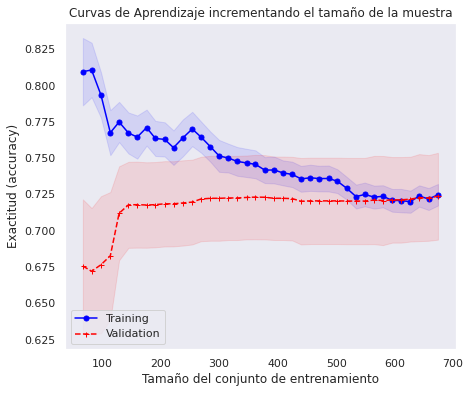

In [124]:
print('Curvas de aprendizaje del modelo árbol de decisiones:')
mi_ModeloYCurvasArbol(X_train)

Curvas de aprendizaje del modelo Random Forest:


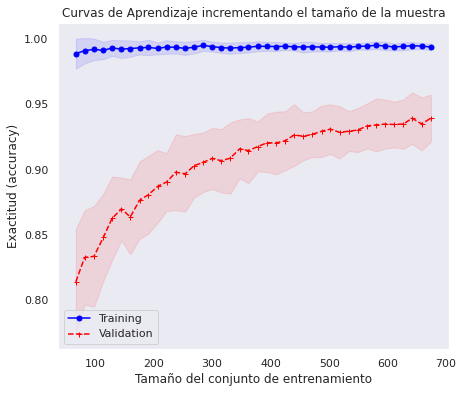

In [125]:
print('Curvas de aprendizaje del modelo Random Forest:')
mi_ModeloYCurvasForest(X_train)

Paso 7: Determina el grado de exactitud a través del reporte de clasificación.

In [126]:
modelo_Forest = RandomForestClassifier(n_estimators=10)
mf = modelo_Forest.fit(X_train, np.ravel(y_train))
predictions = mf.predict(X_test)
print(classification_report(y_test,predictions, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.86      0.99      0.92        87
           2       0.95      0.76      0.85        55
           3       0.99      0.96      0.97        69

    accuracy                           0.92       211
   macro avg       0.93      0.90      0.91       211
weighted avg       0.93      0.92      0.92       211



In [127]:
modelo_DT = DecisionTreeClassifier(max_depth=2, random_state=10)
DT= modelo_DT.fit(X_train, np.ravel(y_train))
predictions = DT.predict(X_test)
print(classification_report(y_test,predictions, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.65      1.00      0.79        87
           2       0.78      0.56      0.65        55
           3       1.00      0.55      0.71        69

    accuracy                           0.74       211
   macro avg       0.81      0.70      0.72       211
weighted avg       0.80      0.74      0.73       211



Paso 8: Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

In [135]:
def CM_modelo(modelo,X,y,X_test,y_test):

    modelo.fit(X, y)

    yhat = modelo.predict(X_test)

    cm = confusion_matrix(y_test, yhat)

    txt = ['P0,0','P0,1','P0,2',
       'P1,0','P1,1','P1,2',
       'P2,0','P2,1','P2,2',]
    frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
    porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
    labels = np.asarray(labels).reshape(3,3)
    labels

    x_axis_labels = [1,2,3] # labels for x-axis
    y_axis_labels = [1,2,3]
    ax = sns.heatmap(cm,annot=labels, fmt='', cmap='Greens', cbar=False, xticklabels= x_axis_labels, yticklabels= y_axis_labels)
    ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
    plt.show()

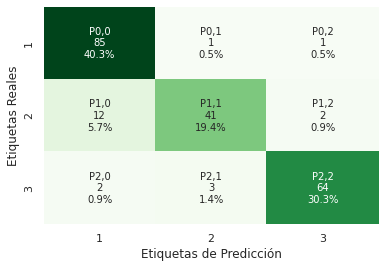

In [136]:
CM_modelo(modelo_Forest,X_train,np.ravel(y_train),X_test,np.ravel(y_test))